# Named Entity Recognition

In [2]:
# ---------------------------------------------------------------------------- #
#                               Imports and setup                              #
# ---------------------------------------------------------------------------- #


# pandas
import pandas as pd

# seaborn
import seaborn as sns
sns.set_palette('Reds')

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

plt.rcParams["figure.figsize"] = (16, 10)
matplotlib_axes_logger.setLevel('ERROR')

# parse dataset
%run "src/generate_detailed_stats.py"

words_count_data, entities_count_data, entity_types_count_data, max_length = collect_stats(
    "entity-tag"
)

In [3]:
words_count = pd.DataFrame.from_dict(words_count_data, orient="index").sort_values(0, ascending=False).reset_index()
words_count.columns = ["Word", "Count"]

entities_count = pd.DataFrame.from_dict(entities_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entities_count.columns = ["Id", "Count"]
entity_type_codes = [id.split(":")[1] for id in entities_count["Id"]]
entities = [id.split(":")[0] for id in entities_count["Id"]]
entities_count["Type"] = entity_type_codes
entities_count["Entity"] = entities
entities_count.drop(columns=["Id"], inplace=True)
entities_count.sort_values(['Type', 'Count'], inplace=True)
entities_count = entities_count[["Type", "Entity", "Count"]]

entity_types_count = pd.DataFrame.from_dict(entity_types_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entity_types_count.columns = ["Entity Type", "Count"]

## Words

### Word occurences

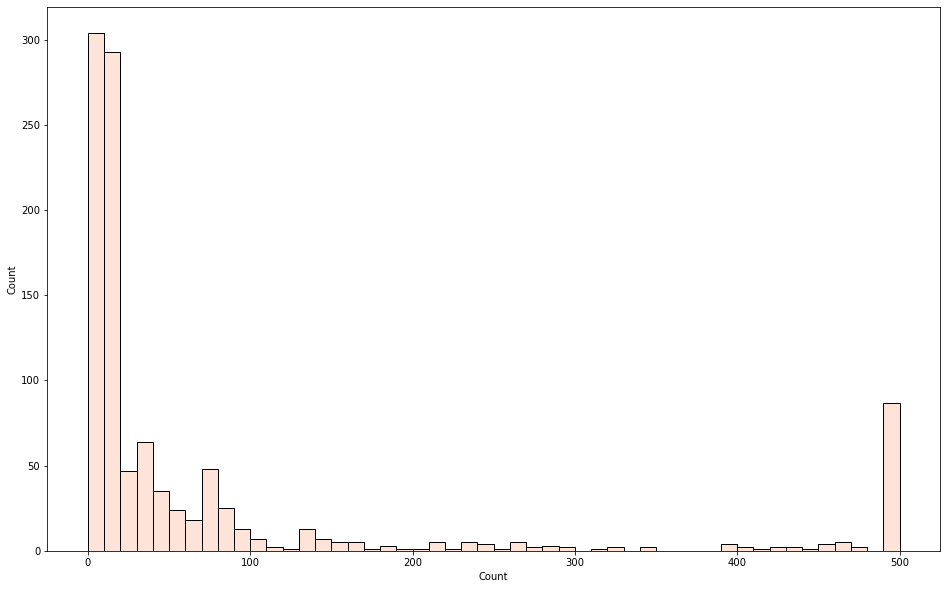

In [4]:
def plot_histplot():
    bins = np.arange(0, 510, 10)
    sns.histplot(data=np.clip(words_count["Count"], bins[0], bins[-1]), bins=bins)
    
plot_histplot()

In [5]:
words_count.select_dtypes("number").describe()

,Count
count,1060.000000
mean,165.609434
std,623.489621
min,1.000000
25%,6.000000
50%,15.500000
75%,72.000000
max,10721.000000


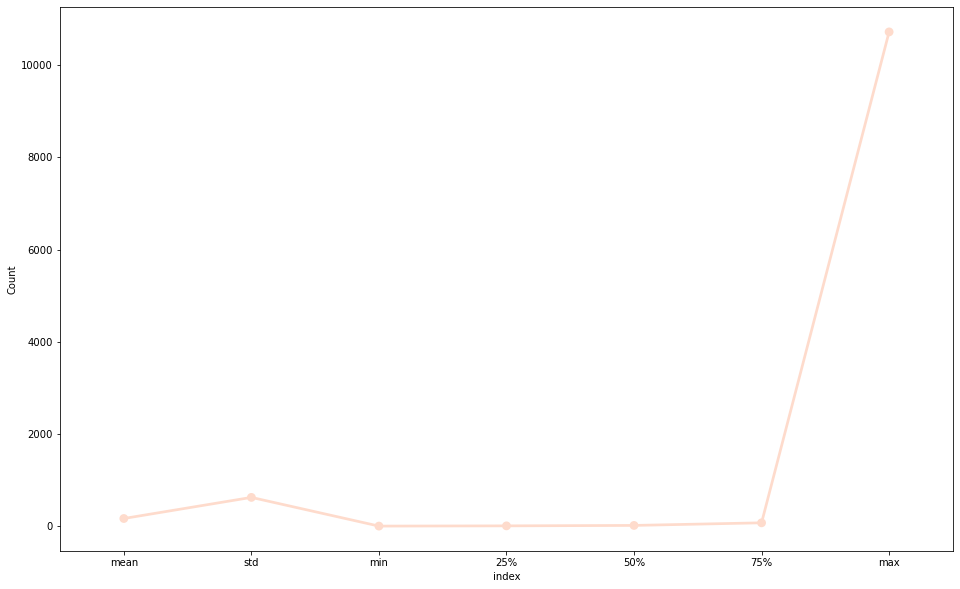

In [6]:
def plot_stats():
    stats = words_count.select_dtypes("number").describe()
    stats.reset_index(inplace=True)
    stats = stats[stats["index"] != "count"]
    
    for col in stats.columns[1:]:
        sns.pointplot(data=stats, x="index", y=col)
    
plot_stats()

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(words_count)

,Word,Count
0,តើ,10721
1,មាន,7961
2,នៅ,7070
3,ទេ,5696
4,បាន,4174
5,ប្រទេស,3530
6,ឬ,3152
7,ការ,2759
8,ពិត,2662
9,ណា,2639


## Entities

In [8]:
entity_types_count

,Entity Type,Count
0,GPE,4285
1,PER,3410
2,ORG,1735
3,EVE,1170
4,FLOOR,914
5,ROOM,793
6,MAJOR,497
7,BUILD,409
8,ANN,112
9,TIME,40


<AxesSubplot:xlabel='Entity Type', ylabel='Count'>

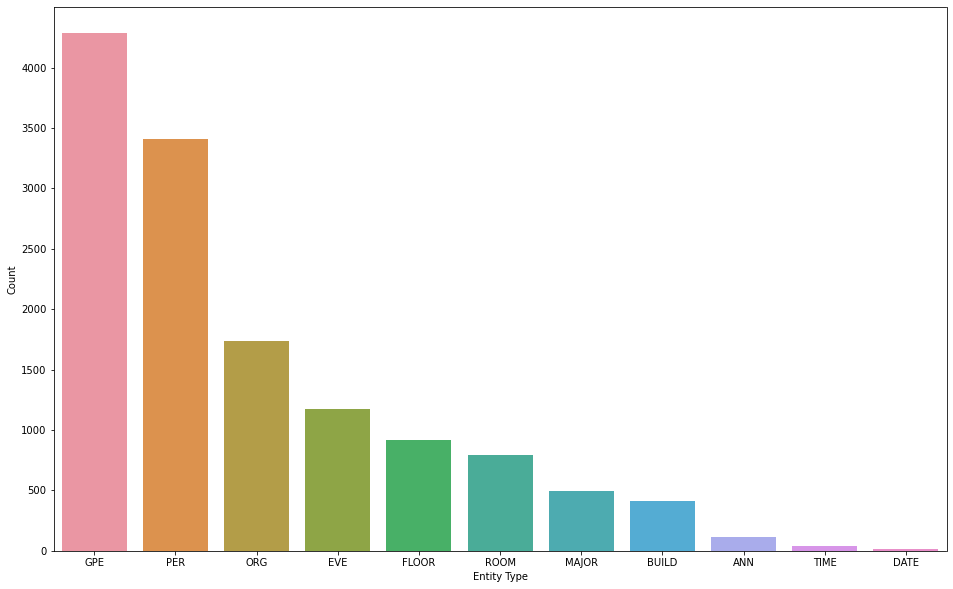

In [9]:
sns.barplot(data=entity_types_count, x="Entity Type", y="Count")

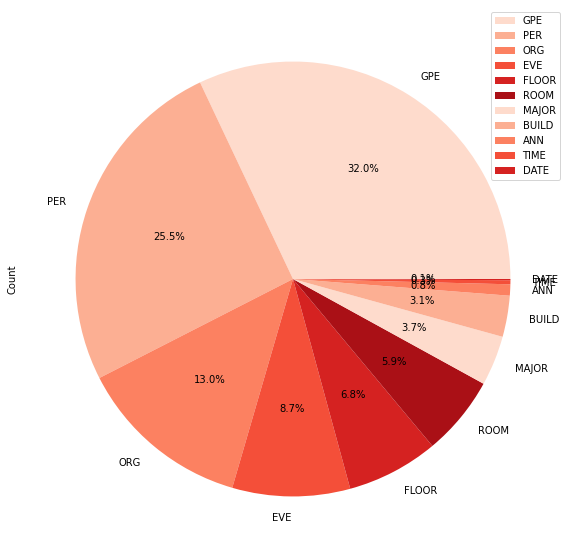

In [10]:
def plot_pieplot():
    entity_types_count.set_index("Entity Type").plot.pie(y="Count", autopct='%.1f%%')
    
plot_pieplot()

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(entities_count)

,Type,Entity,Count
77,ANN,ការងារស្ម័គ្រចិត្ត,56
78,ANN,អាហារូបករណ៍ទៅបារាំង,56
147,BUILD,អគារសែលកាត,28
148,BUILD,អគារបុរី,28
149,BUILD,អគារវឌ្ឍនៈ,28
144,BUILD,អគារមិត្តហ្វូន,29
145,BUILD,អគារស្មាត,29
146,BUILD,អគាររតនៈ,29
93,BUILD,អគារនវានុវត្តន៍,40
63,BUILD,អគារInnovationCenter,66


In [12]:
entities_count.groupby('Type').agg({"Count": ['mean', 'sum', 'median', 'min', 'max', 'count']})

Count                             
             mean   sum median  min  max count
Type                                          
ANN     56.000000   112   56.0   56   56     2
BUILD   40.900000   409   29.0   28   66    10
DATE     2.000000    12    2.0    2    2     6
EVE    234.000000  1170  234.0  234  234     5
FLOOR   70.307692   914   98.0    6  155    13
GPE     18.234043  4285   12.0    1   87   235
MAJOR   49.700000   497   52.0   15   63    10
ORG     28.442623  1735   17.0    1  281    61
PER     27.063492  3410   18.0    3  130   126
ROOM    33.041667   793   33.0    1   54    24
TIME    10.000000    40   10.0   10   10     4

<AxesSubplot:xlabel='Type', ylabel='Count'>

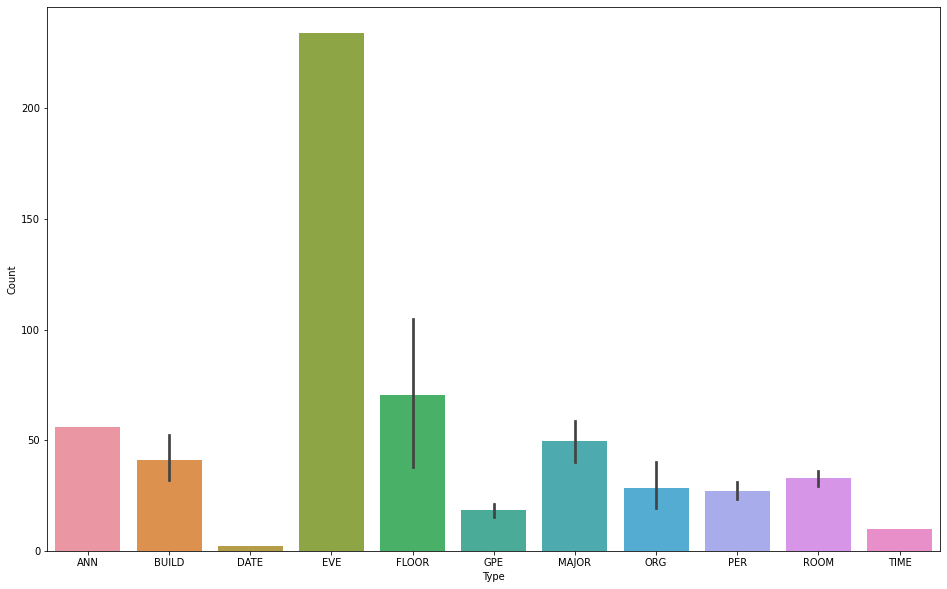

In [13]:
sns.barplot(data=entities_count, x="Type", y="Count")